In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("weatherHistory.csv")
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [10]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

But before visualization, we need to make date features -> date time object . For this we use to_datetime() fn

In [11]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns, UTC]

In [12]:
df.dtypes

Formatted Date              datetime64[ns, UTC]
Summary                                  object
Precip Type                              object
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                  float64
Visibility (km)                         float64
Loud Cover                              float64
Pressure (millibars)                    float64
Daily Summary                            object
dtype: object

In [13]:
df=df.set_index('Formatted Date')
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [14]:
data_columns = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = df[data_columns].resample('MS').mean()
df_monthly_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


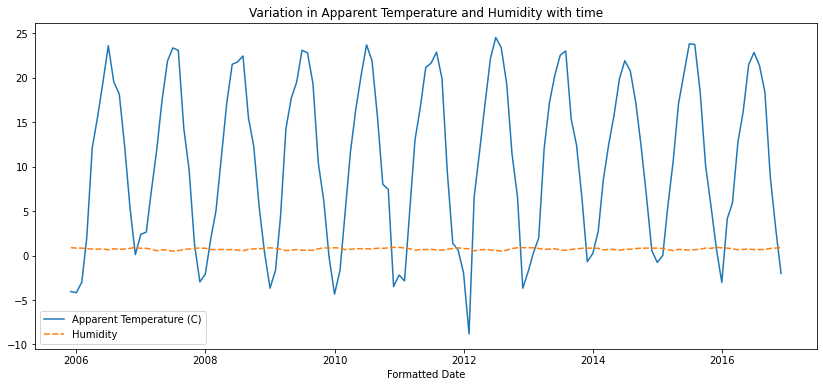

In [15]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(14,6))
plt.title("Variation in Apparent Temperature and Humidity with time")
sns.lineplot(data=df_monthly_mean)

Observation : From the above plot, we can say that humidity remained almost constant in these years. Even the average apparent temperature is almost same

In [16]:
df1 = df_monthly_mean[df_monthly_mean.index.month==4]
print(df1)
df1.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-04-01 00:00:00+00:00                 12.098827  0.728625
2007-04-01 00:00:00+00:00                 11.894421  0.536361
2008-04-01 00:00:00+00:00                 11.183688  0.693194
2009-04-01 00:00:00+00:00                 14.267076  0.567847
2010-04-01 00:00:00+00:00                 11.639406  0.706875
2011-04-01 00:00:00+00:00                 12.978997  0.591625
2012-04-01 00:00:00+00:00                 11.782770  0.650222
2013-04-01 00:00:00+00:00                 12.045563  0.677667
2014-04-01 00:00:00+00:00                 12.486181  0.691403
2015-04-01 00:00:00+00:00                 10.632801  0.547764
2016-04-01 00:00:00+00:00                 12.731427  0.659972


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

ConversionError: Failed to convert value(s) to axis units: ['04-01-2006', '04-01-2007', '04-01-2008', '04-01-2009', '04-01-2010', '04-01-2011', '04-01-2012', '04-01-2013', '04-01-2014', '04-01-2015', '04-01-2016']

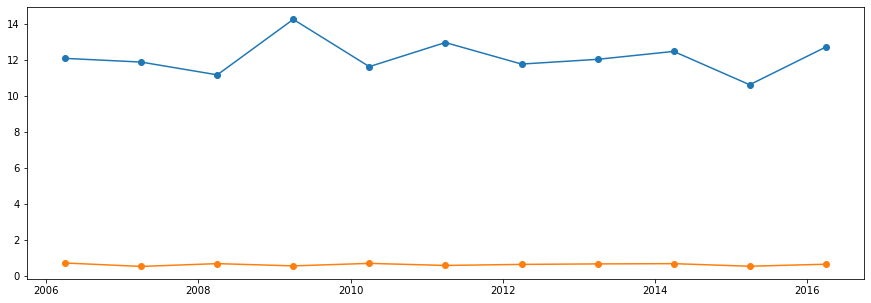

In [19]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)')
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
ax.set_xticks(['04-01-2006','04-01-2007','04-01-2008','04-01-2009','04-01-2010','04-01-2011','04-01-2012','04-01-2013','04-01-2014','04-01-2015','04-01-2016'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %m %Y'))
ax.legend(loc = 'center right')
ax.set_xlabel('Month of April')

Observation : No change in average humidity. Increase in average apparent temperature can be seen in the year 2009 then again it dropped in 2010 then there was a slight increase in 2011 then a significant drop is observed in 2015 and again it increased in 2016 .

In [22]:
jan = data[data.index.month==1]
plt.figure(figsize=(15,5))
plt.plot(jan.loc['2006-01-01':'2016-01-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(jan.loc['2006-01-01':'2016-01-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'Black');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('Month of January', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

AttributeError: 'RangeIndex' object has no attribute 'month'